In [23]:
#Import main file and libraries
import pandas as pd
import glob, os
from pathlib import Path
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV

final_df = pd.read_csv('./stock_project.csv', na_values='NaN')
final_df.index = final_df['symbol']
final_df.drop('symbol',axis=1,inplace=True)

Index(['AAWW', 'AAWW', 'AAWW', 'AAWW', 'AAWW', 'AAWW', 'AAWW', 'AAWW', 'AAWW',
       'AAWW',
       ...
       'ZEAL', 'ZEAL', 'ZEAL', 'ZEAL', 'ZEAL', 'ZEAL', 'ZEAL', 'ZEAL', 'ZEAL',
       'ZEAL'],
      dtype='object', name='symbol', length=43061)


335/335 - 5s - loss: 7.4190e-05


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE =  3.7566068880840042


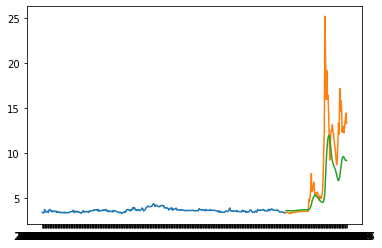

In [37]:
#Univariate LSTM

symbolGroup = final_df.groupby(final_df.index)
data = symbolGroup.get_group('APT')

format_data = pd.DataFrame(index=range(0,len(data)), columns=['Date','Price'])
for i in range(0,len(data)):
    format_data['Date'][i] = data['date'][i]
    format_data['Price'][i] = data['close_adjusted'][i]
format_data.index = format_data.Date
format_data.drop('Date',axis=1,inplace=True)

dataset = format_data.values
trainSize = int(0.8 * len(format_data))
train = dataset[0:trainSize,:]
test = dataset[trainSize:,:]

scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range (60,len(train)):
    x_train.append(scaled[i-60:i,0])
    y_train.append(scaled[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

model = Sequential()
model.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit(x_train,y_train,epochs=1,batch_size=1,verbose=2)
inputs = format_data[len(format_data) - len(test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

x_test = []
for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
price = model.predict(x_test)
price = scaler.inverse_transform(price)

rms = np.sqrt(np.mean(np.power((test - price),2)))

import matplotlib.pyplot as plt
train = format_data[:trainSize]
test = format_data[trainSize:]
test['Predictions'] = price
plt.plot(train['Price'])
plt.plot(test[['Price','Predictions']])
print("RMSE = ",rms)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Epoch 1/1000
8/8 - 0s - loss: 0.0162 - val_loss: 0.2976
Epoch 2/1000
8/8 - 0s - loss: 0.0145 - val_loss: 0.2441
Epoch 3/1000
8/8 - 0s - loss: 0.0145 - val_loss: 0.2072
Epoch 4/1000
8/8 - 0s - loss: 0.0142 - val_loss: 0.1900
Epoch 5/1000
8/8 - 0s - loss: 0.0130 - val_loss: 0.1708
Epoch 6/1000
8/8 - 0s - loss: 0.0105 - val_loss: 0.1347
Epoch 7/1000
8/8 - 0s - loss: 0.0087 - val_loss: 0.0949
Epoch 8/1000
8/8 - 0s - loss: 0.0078 - val_loss: 0.0663
Epoch 9/1000
8/8 - 0s - loss: 0.0067 - val_loss: 0.0383
Epoch 10/1000
8/8 - 0s - loss: 0.0041 - val_loss: 0.0311
Epoch 11/1000
8/8 - 0s - loss: 0.0030 - val_loss: 0.0599
Epoch 12/1000
8/8 - 0s - loss: 0.0012 - val_loss: 0.0978
Epoch 13/1000
8/8 - 0s - loss: 0.0018 - val_loss: 0.1077
Epoch 14/1000
8/8 - 0s - loss: 0.0023 - val_loss: 0.1011
Epoch 15/1000
8/8 - 0s - loss: 0.0016 - val_loss: 0.0808
Epoch 16/1000
8/8 - 0s - loss: 0.0015 - val_loss: 0.0648
Epoch 17/1000
8/8 - 0s - loss: 0.0013 - val_loss: 0.0626
Epoch 18/1000
8/8 - 0s - loss: 0.0017 - 

Epoch 141/1000
8/8 - 0s - loss: 0.0010 - val_loss: 0.0145
Epoch 142/1000
8/8 - 0s - loss: 0.0017 - val_loss: 0.0174
Epoch 143/1000
8/8 - 0s - loss: 6.8583e-04 - val_loss: 0.0359
Epoch 144/1000
8/8 - 0s - loss: 7.6450e-04 - val_loss: 0.0403
Epoch 145/1000
8/8 - 0s - loss: 0.0021 - val_loss: 0.0315
Epoch 146/1000
8/8 - 0s - loss: 5.3416e-04 - val_loss: 0.0135
Epoch 147/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0133
Epoch 148/1000
8/8 - 0s - loss: 0.0016 - val_loss: 0.0180
Epoch 149/1000
8/8 - 0s - loss: 6.7018e-04 - val_loss: 0.0383
Epoch 150/1000
8/8 - 0s - loss: 9.8425e-04 - val_loss: 0.0430
Epoch 151/1000
8/8 - 0s - loss: 0.0024 - val_loss: 0.0375
Epoch 152/1000
8/8 - 0s - loss: 7.9018e-04 - val_loss: 0.0146
Epoch 153/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0133
Epoch 154/1000
8/8 - 0s - loss: 0.0015 - val_loss: 0.0153
Epoch 155/1000
8/8 - 0s - loss: 8.9130e-04 - val_loss: 0.0119
Epoch 156/1000
8/8 - 0s - loss: 8.4419e-04 - val_loss: 0.0107
Epoch 157/1000
8/8 - 0s - loss: 0.0019 -

Epoch 278/1000
8/8 - 0s - loss: 6.7865e-04 - val_loss: 0.0187
Epoch 279/1000
8/8 - 0s - loss: 0.0010 - val_loss: 0.0177
Epoch 280/1000
8/8 - 0s - loss: 0.0018 - val_loss: 0.0194
Epoch 281/1000
8/8 - 0s - loss: 7.7028e-04 - val_loss: 0.0347
Epoch 282/1000
8/8 - 0s - loss: 6.7782e-04 - val_loss: 0.0407
Epoch 283/1000
8/8 - 0s - loss: 0.0020 - val_loss: 0.0364
Epoch 284/1000
8/8 - 0s - loss: 6.9709e-04 - val_loss: 0.0273
Epoch 285/1000
8/8 - 0s - loss: 5.4406e-04 - val_loss: 0.0285
Epoch 286/1000
8/8 - 0s - loss: 6.0279e-04 - val_loss: 0.0342
Epoch 287/1000
8/8 - 0s - loss: 4.3797e-04 - val_loss: 0.0413
Epoch 288/1000
8/8 - 0s - loss: 8.0502e-04 - val_loss: 0.0389
Epoch 289/1000
8/8 - 0s - loss: 0.0015 - val_loss: 0.0309
Epoch 290/1000
8/8 - 0s - loss: 5.5535e-04 - val_loss: 0.0190
Epoch 291/1000
8/8 - 0s - loss: 0.0023 - val_loss: 0.0185
Epoch 292/1000
8/8 - 0s - loss: 6.8925e-04 - val_loss: 0.0268
Epoch 293/1000
8/8 - 0s - loss: 2.9312e-04 - val_loss: 0.0290
Epoch 294/1000
8/8 - 0s - lo

Epoch 413/1000
8/8 - 0s - loss: 8.9957e-04 - val_loss: 0.0317
Epoch 414/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0381
Epoch 415/1000
8/8 - 0s - loss: 6.7429e-04 - val_loss: 0.0454
Epoch 416/1000
8/8 - 0s - loss: 0.0017 - val_loss: 0.0434
Epoch 417/1000
8/8 - 0s - loss: 6.9258e-04 - val_loss: 0.0361
Epoch 418/1000
8/8 - 0s - loss: 7.8304e-04 - val_loss: 0.0415
Epoch 419/1000
8/8 - 0s - loss: 5.8002e-04 - val_loss: 0.0504
Epoch 420/1000
8/8 - 0s - loss: 0.0015 - val_loss: 0.0500
Epoch 421/1000
8/8 - 0s - loss: 0.0014 - val_loss: 0.0469
Epoch 422/1000
8/8 - 0s - loss: 4.5428e-04 - val_loss: 0.0396
Epoch 423/1000
8/8 - 0s - loss: 5.6425e-04 - val_loss: 0.0346
Epoch 424/1000
8/8 - 0s - loss: 3.8537e-04 - val_loss: 0.0387
Epoch 425/1000
8/8 - 0s - loss: 3.7205e-04 - val_loss: 0.0369
Epoch 426/1000
8/8 - 0s - loss: 2.6596e-04 - val_loss: 0.0379
Epoch 427/1000
8/8 - 0s - loss: 3.9500e-04 - val_loss: 0.0322
Epoch 428/1000
8/8 - 0s - loss: 3.7191e-04 - val_loss: 0.0306
Epoch 429/1000
8/8 - 0s 

Epoch 549/1000
8/8 - 0s - loss: 0.0014 - val_loss: 0.0501
Epoch 550/1000
8/8 - 0s - loss: 6.3389e-04 - val_loss: 0.0621
Epoch 551/1000
8/8 - 0s - loss: 3.1056e-04 - val_loss: 0.0677
Epoch 552/1000
8/8 - 0s - loss: 4.8586e-04 - val_loss: 0.0662
Epoch 553/1000
8/8 - 0s - loss: 7.9859e-04 - val_loss: 0.0597
Epoch 554/1000
8/8 - 0s - loss: 9.4052e-04 - val_loss: 0.0540
Epoch 555/1000
8/8 - 0s - loss: 0.0017 - val_loss: 0.0536
Epoch 556/1000
8/8 - 0s - loss: 8.0590e-04 - val_loss: 0.0587
Epoch 557/1000
8/8 - 0s - loss: 4.6236e-04 - val_loss: 0.0534
Epoch 558/1000
8/8 - 0s - loss: 5.4756e-04 - val_loss: 0.0558
Epoch 559/1000
8/8 - 0s - loss: 9.4710e-04 - val_loss: 0.0647
Epoch 560/1000
8/8 - 0s - loss: 8.8637e-04 - val_loss: 0.0716
Epoch 561/1000
8/8 - 0s - loss: 0.0016 - val_loss: 0.0691
Epoch 562/1000
8/8 - 0s - loss: 6.1713e-04 - val_loss: 0.0539
Epoch 563/1000
8/8 - 0s - loss: 8.2589e-04 - val_loss: 0.0555
Epoch 564/1000
8/8 - 0s - loss: 7.9514e-04 - val_loss: 0.0663
Epoch 565/1000
8/8 -

Epoch 685/1000
8/8 - 0s - loss: 8.1103e-04 - val_loss: 0.0647
Epoch 686/1000
8/8 - 0s - loss: 6.4879e-04 - val_loss: 0.0615
Epoch 687/1000
8/8 - 0s - loss: 0.0016 - val_loss: 0.0665
Epoch 688/1000
8/8 - 0s - loss: 3.3225e-04 - val_loss: 0.0854
Epoch 689/1000
8/8 - 0s - loss: 0.0010 - val_loss: 0.0877
Epoch 690/1000
8/8 - 0s - loss: 0.0013 - val_loss: 0.0801
Epoch 691/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0653
Epoch 692/1000
8/8 - 0s - loss: 0.0014 - val_loss: 0.0599
Epoch 693/1000
8/8 - 0s - loss: 0.0019 - val_loss: 0.0583
Epoch 694/1000
8/8 - 0s - loss: 7.9064e-04 - val_loss: 0.0602
Epoch 695/1000
8/8 - 0s - loss: 0.0015 - val_loss: 0.0668
Epoch 696/1000
8/8 - 0s - loss: 5.4280e-04 - val_loss: 0.0812
Epoch 697/1000
8/8 - 0s - loss: 0.0014 - val_loss: 0.0843
Epoch 698/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0806
Epoch 699/1000
8/8 - 0s - loss: 4.6017e-04 - val_loss: 0.0719
Epoch 700/1000
8/8 - 0s - loss: 4.4573e-04 - val_loss: 0.0647
Epoch 701/1000
8/8 - 0s - loss: 4.1762e-04 -

8/8 - 0s - loss: 7.9817e-04 - val_loss: 0.0593
Epoch 821/1000
8/8 - 0s - loss: 0.0017 - val_loss: 0.0587
Epoch 822/1000
8/8 - 0s - loss: 4.0062e-04 - val_loss: 0.0726
Epoch 823/1000
8/8 - 0s - loss: 6.5359e-04 - val_loss: 0.0710
Epoch 824/1000
8/8 - 0s - loss: 4.4465e-04 - val_loss: 0.0598
Epoch 825/1000
8/8 - 0s - loss: 0.0010 - val_loss: 0.0594
Epoch 826/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0665
Epoch 827/1000
8/8 - 0s - loss: 4.3804e-04 - val_loss: 0.0779
Epoch 828/1000
8/8 - 0s - loss: 3.8903e-04 - val_loss: 0.0762
Epoch 829/1000
8/8 - 0s - loss: 3.7390e-04 - val_loss: 0.0754
Epoch 830/1000
8/8 - 0s - loss: 4.1265e-04 - val_loss: 0.0783
Epoch 831/1000
8/8 - 0s - loss: 0.0012 - val_loss: 0.0758
Epoch 832/1000
8/8 - 0s - loss: 0.0012 - val_loss: 0.0721
Epoch 833/1000
8/8 - 0s - loss: 3.4487e-04 - val_loss: 0.0740
Epoch 834/1000
8/8 - 0s - loss: 4.2603e-04 - val_loss: 0.0713
Epoch 835/1000
8/8 - 0s - loss: 8.0640e-04 - val_loss: 0.0629
Epoch 836/1000
8/8 - 0s - loss: 0.0013 - va

8/8 - 0s - loss: 2.8630e-04 - val_loss: 0.0798
Epoch 956/1000
8/8 - 0s - loss: 4.8534e-04 - val_loss: 0.0813
Epoch 957/1000
8/8 - 0s - loss: 9.9719e-04 - val_loss: 0.0785
Epoch 958/1000
8/8 - 0s - loss: 0.0012 - val_loss: 0.0764
Epoch 959/1000
8/8 - 0s - loss: 4.9824e-04 - val_loss: 0.0798
Epoch 960/1000
8/8 - 0s - loss: 4.0859e-04 - val_loss: 0.0805
Epoch 961/1000
8/8 - 0s - loss: 0.0010 - val_loss: 0.0732
Epoch 962/1000
8/8 - 0s - loss: 6.7700e-04 - val_loss: 0.0674
Epoch 963/1000
8/8 - 0s - loss: 0.0014 - val_loss: 0.0699
Epoch 964/1000
8/8 - 0s - loss: 3.2934e-04 - val_loss: 0.0843
Epoch 965/1000
8/8 - 0s - loss: 8.0844e-04 - val_loss: 0.0847
Epoch 966/1000
8/8 - 0s - loss: 0.0011 - val_loss: 0.0783
Epoch 967/1000
8/8 - 0s - loss: 3.4000e-04 - val_loss: 0.0734
Epoch 968/1000
8/8 - 0s - loss: 2.0551e-04 - val_loss: 0.0755
Epoch 969/1000
8/8 - 0s - loss: 3.3529e-04 - val_loss: 0.0723
Epoch 970/1000
8/8 - 0s - loss: 4.7043e-04 - val_loss: 0.0665
Epoch 971/1000
8/8 - 0s - loss: 2.2763e

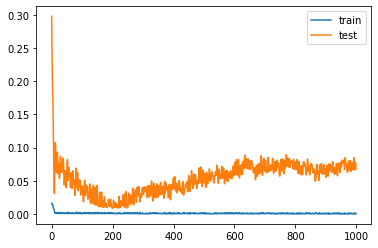

RMSE =  35630.48


In [40]:
#Multivariate LSTM

data_set = symbolGroup.get_group('APT')
data_set.index = data_set.date
data_set.drop(data_set.columns[[1,2,3,4,5,7,8]],axis=1,inplace=True)

def series_to_supervised(data_set, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data_set) is list else data_set.shape[1]
    multi_data = pd.DataFrame(data_set)
    cols, names = list(), list()
    for i in range(n_in,0,-1):
        cols.append(multi_data.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    
    for i in range(0,n_out):
        cols.append(multi_data.shift(-i))
        if i==0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    aggregated = pd.concat(cols,axis=1)
    aggregated.columns = names
    
    if dropnan:
        aggregated.dropna()
    return aggregated

values = data_set.values
values = values.astype('float32')
scaler = MinMaxScaler(feature_range=(0,1))
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled,5,1)
reframed.drop(reframed.columns[[3,5]],axis=1,inplace=True)
reframed.dropna(inplace=True)

#Version 1

values = reframed.values
trainSize = int(0.8 * len(reframed))
train = values[:trainSize, :]
test = values[trainSize:, :]

train_x, train_y = train[:, :-1], train[:, -1]
test_x, test_y = test[:, :-1], test[:, -1]
train_x = train_x.reshape((train_x.shape[0],1,train_x.shape[1]))
test_x = test_x.reshape((test_x.shape[0],1,test_x.shape[1]))

model = Sequential()
model.add(LSTM(50, input_shape=(train_x.shape[1], train_x.shape[2])))
model.add(Dense(1))
model.compile(loss='mae',optimizer='adam')
history = model.fit(train_x, train_y, epochs=1000, batch_size=50, validation_data=(test_x, test_y),verbose=2,shuffle=False)

plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='test')
plt.legend()
plt.show()

yhat = model.predict(test_x)
test_x = test_x.reshape(test_x.shape[0],test_x.shape[2])

invyhat = np.concatenate((yhat, test_x[:, -2:]), axis=1)
invyhat = scaler.inverse_transform(invyhat)
invyhat = invyhat[:,0]

test_y = test_y.reshape((len(test_y), 1))
invy = np.concatenate((test_y, test_x[:, -2:]), axis=1)
invy = scaler.inverse_transform(invy)
invy = invy[:,0]
rmse = np.sqrt(mean_squared_error(invy,invyhat))
print ("RMSE = ", rmse)

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/ipykernel/__main__.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE =  6.471844199668853


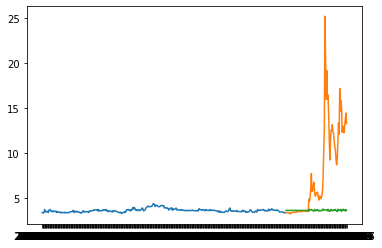

In [41]:
#K-Nearest Neighbor Clustering

scaler = MinMaxScaler(feature_range=(0,1))
data = symbolGroup.get_group('APT')

format_data = pd.DataFrame(index=range(0,len(data)), columns=['Date','Price','Volume'])
for i in range(0,len(data)):
    format_data['Date'][i] = data['date'][i]
    format_data['Volume'][i] = data['volume'][i]
    format_data['Price'][i] = data['close_adjusted'][i]
format_data.index = format_data.Date
format_data.drop('Date',axis=1,inplace=True)

trainSize = int(0.8 * len(format_data))
train = format_data[:trainSize]
test = format_data[trainSize:]
train_x = train.drop('Price',axis=1)
train_y = train['Price']
test_x = test.drop('Price',axis=1)
test_y = test['Price']


train_x_scaled = scaler.fit_transform(train_x)
train_x = pd.DataFrame(train_x_scaled)
test_x_scaled = scaler.fit_transform(test_x)
test_x = pd.DataFrame(test_x_scaled)

parameters = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn,parameters,cv=5)

model.fit(train_x,train_y)
predictions = model.predict(test_x)

rmse = np.sqrt(np.mean(np.power((np.array(test_y)-np.array(predictions)),2)))

test['Predictions'] = 0
test['Predictions'] = predictions
plt.plot(train['Price'])
plt.plot(test[['Price','Predictions']])
print("RMSE = ",rmse)

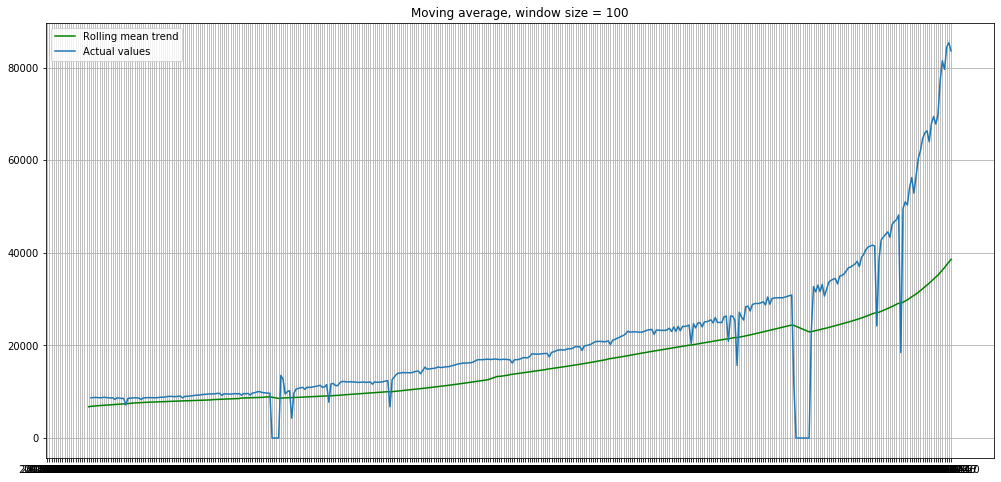

In [42]:
from sklearn.metrics import mean_absolute_error

data = symbolGroup.get_group('CEN')
format_data = pd.DataFrame(index=range(0,len(data)), columns=['Date','Users_Holding'])
for i in range(0,len(data)):
    format_data['Date'][i] = data['date'][i]
    format_data['Users_Holding'][i] = data['users_holding'][i]
format_data.index = format_data.Date
format_data.drop('Date',axis=1,inplace=True)

def moving_average(series, window, intervals=False, scale=1.96):
    
    rolling_mean = series.rolling(window=window).mean()
    
    plt.figure(figsize=(17,8))
    plt.title('Moving average, window size = {}'.format(window))
    plt.plot(rolling_mean, 'g', label='Rolling mean trend')
    
    if intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        dev = np.std(series[window:] - rolling_mean[window:])
        lb = rolling_mean - (mae + scale * dev)
        ub = rolling_mean + (mae + scale * dev)
        plt.plot(ub,'r--',label='Upper bound / lower bound')
        plt.plot(lb,'r--')
        
    plt.plot(series[window:], label='Actual values')
    plt.legend(loc='best')
    plt.grid(True)
    
moving_average(format_data['Users_Holding'], 100)

#moving_average(df['users_holding'], 500)

#moving_average(df['users_holding'], 1000, intervals=True)

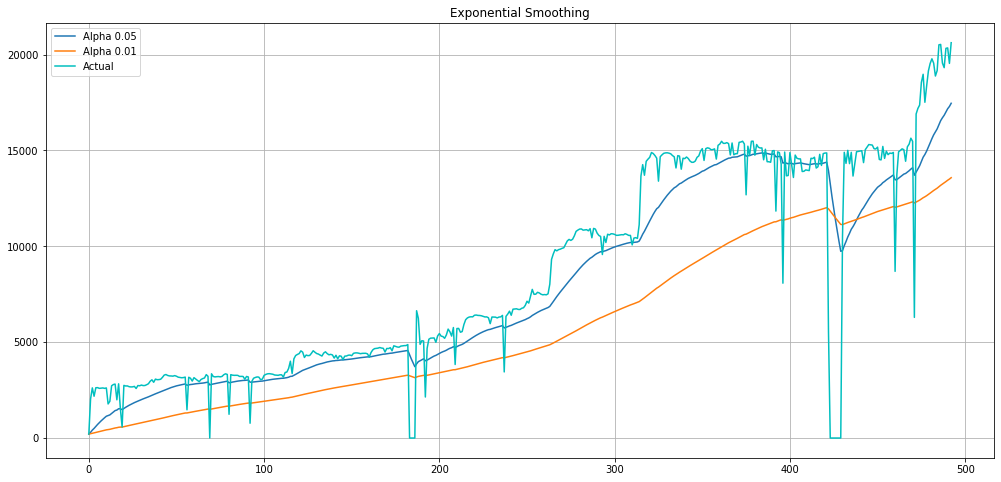

In [7]:
#Exponential smoothing
def exp_smoothing(series, alpha):
    
    res = [series[0]]
    for i in range(1,len(series)):
        res.append(alpha * series[i] + (1-alpha) * res[i-1])
    return res

def plot_exp_smoothing(series, alphas):
    
    plt.figure(figsize=(17,8))
    for alpha in alphas:
        plt.plot(exp_smoothing(series,alpha), label="Alpha {}".format(alpha))
    plt.plot(series.values, "c", label="Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title('Exponential Smoothing')
    plt.grid('True');
    
plot_exp_smoothing(format_data['Users_Holding'],[0.05,0.01])

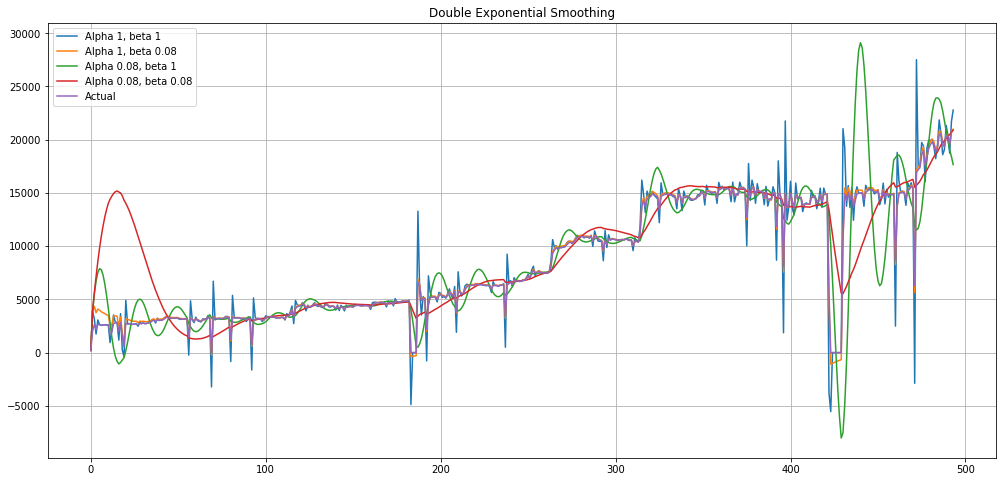

In [13]:
#Double exponential smoothing
def double_exp_smoothing(series,alpha,beta):
    
    res = [series[0]]
    for i in range(1,len(series)+1):
        if i==1:
            level, trend = series[0], series[1]-series[0]
        if i>=len(series):
            value = res[-1]
        else:
            value = series[i]
        last_level, level=level, alpha * value + (1-alpha) * (level+trend)
        trend = beta * (level-last_level) + (1-beta) * trend
        res.append(level+trend)
    return res

def plot_double_exp_smoothing(series,alphas,betas):
    
    plt.figure(figsize=(17,8))
    for alpha in alphas:
        for beta in betas:
            plt.plot(double_exp_smoothing(series,alpha,beta), label="Alpha {}, beta {}".format(alpha,beta))
    plt.plot(series.values, label="Actual")
    plt.legend(loc="best")
    plt.axis('tight')
    plt.title('Double Exponential Smoothing')
    plt.grid('True');

plot_double_exp_smoothing(format_data['Users_Holding'], alphas=[1,0.08], betas=[1,0.08])